# Linear Regression Multivar

## 1. Reading Data using Panda

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('data/train.csv')

In [4]:
data[:10]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
data.shape

(1460, 81)

## 2. Data visualization

In [6]:
import seaborn as sns

In [7]:
%matplotlib inline

/Users/josue/.virtualenvs/is-hw1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


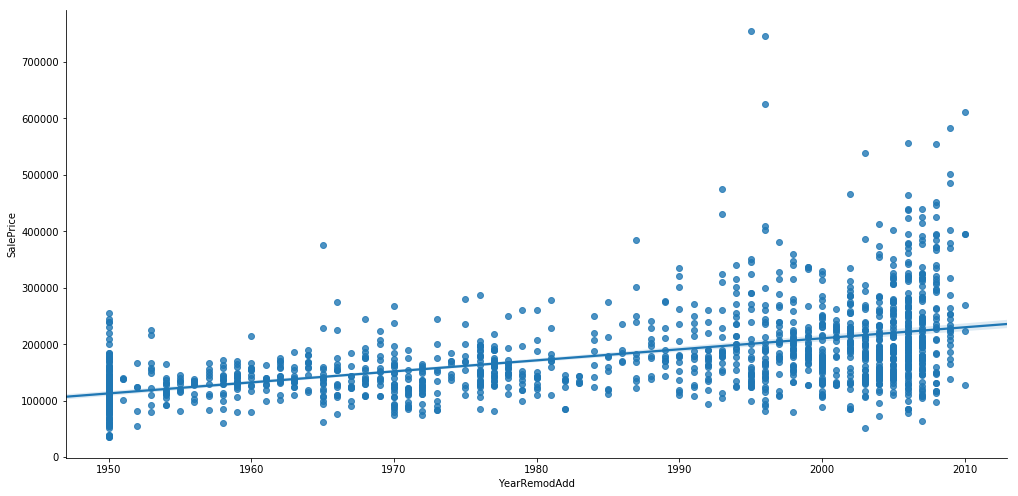

In [8]:
sns.pairplot(data, x_vars='YearRemodAdd', y_vars='SalePrice', height=7, aspect=2, kind='reg')

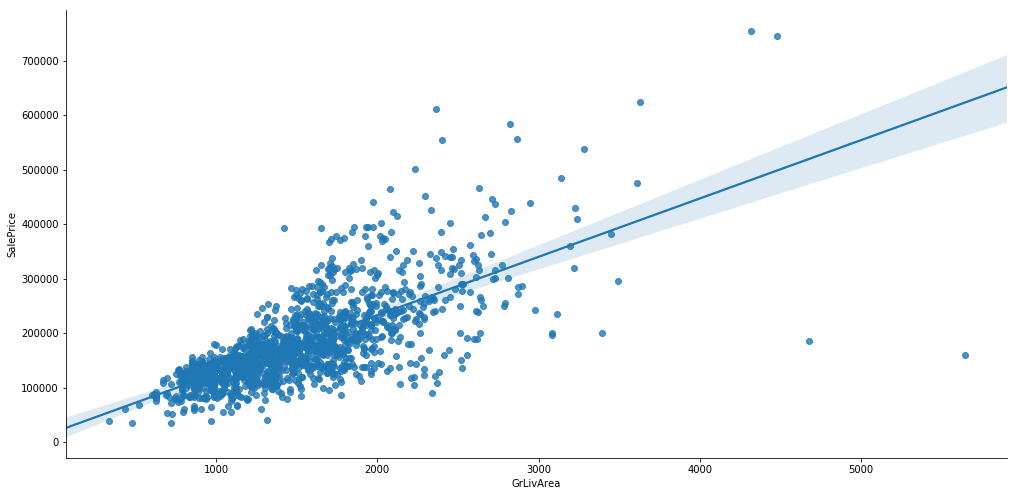

In [9]:
sns.pairplot(data, x_vars='GrLivArea', y_vars='SalePrice', height=7, aspect=2, kind='reg')

In [10]:
data['MSZoning'] = data['MSZoning'].map({'A': 1,'C (all)':2, 'FV':3, 'I':4, 'RH':5, 'RL':6, 'RP':7, 'RM':8 })
data['Street'] = data['Street'].map({'Grvl':1 ,'Pave': 2})
data['Alley'] = data['Alley'].map({'NA': 1, 'Grvl':2 ,'Pave': 3})
data['LotShape'] = data['LotShape'].map({'Reg':1, 'IR1':2 ,'IR2':3, 'IR3':4})
data['LandContour'] = data['LandContour'].map({'Lvl': 4,'Bnk': 3, 'HLS': 2, 'Low': 1})
data['Utilities'] = data['Utilities'].map({ 'AllPub':4, 'NoSewr':3, 'NoSeWa' :1, 'ELO': 1})
data['LotConfig'] = data['LotConfig'].map({'Inside': 1, 'Corner': 2, 'CulDSac': 3, 'FR2': 4, 'FR3':5})
data['LandSlope'] = data['LandSlope'].map({'Gtl': 3, 'Mod': 2, 'Sev': 1})
data['Neighborhood'] = data['Neighborhood'].map({ 'Blmngtn': 1, 'Blueste': 2, 'BrDale': 3, 'BrkSide': 4, 'ClearCr': 5, 'CollgCr': 6, 'Crawfor': 7, 'Edwards': 8,'Gilbert': 9, 'IDOTRR': 10, 'MeadowV': 11, 'Mitchel': 12, 'Names': 13, 'NoRidge': 14, 'NPkVill': 15,'NridgHt': 16, 'NWAmes': 17, 'OldTown': 18, 'SWISU': 19, 'Sawyer': 20, 'SawyerW': 21, 'Somerst': 22, 'StoneBr': 23, 'Timber': 24, 'Veenker':25})
data['Condition1'] = data['Condition1'].map({ 'Artery': 1, 'Feedr': 2, 'Norm': 3, 'RRNn': 4, 'RRAn': 5, 'PosN': 6, 'PosA': 7, 'RRNe': 8, 'RRAe':9})
data['Condition2'] = data['Condition2'].map({ 'Artery': 1, 'Feedr': 2, 'Norm': 3, 'RRNn': 4, 'RRAn': 5, 'PosN': 6, 'PosA': 7, 'RRNe': 8, 'RRAe':9})
data['BldgType'] = data['BldgType'].map({'1Fam': 1, '2FmCon': 2, 'Duplx': 3, 'TwnhsE': 4, 'TwnhsI': 5})
data['HouseStyle'] = data['HouseStyle'].map({ '1Story': 1, '1.5Fin': 2, '1.5Unf': 3, '2Story': 4, '2.5Fin': 5, '2.5Unf': 6, 'SFoyer': 7, 'SLvl': 8})
data['RoofStyle'] = data['RoofStyle'].map({'Flat': 1, 'Gable': 2, 'Gambrel': 3, 'Hip': 4, 'Mansard': 5, 'Shed': 6})
data['RoofMatl'] = data['RoofMatl'].map({'ClyTile': 1, 'CompShg': 2, 'Membran': 3, 'Metal': 4, 'Roll': 5, 'Tar&Grv': 6, 'WdShake': 7, 'WdShngl':8})
data['Exterior1st'] = data['Exterior1st'].map({'AsbShng': 1, 'AsphShn': 2, 'BrkComm': 3, 'BrkFace': 4, 'CBlock': 5, 'CemntBd': 6, 'HdBoard': 7, 'ImStucc':8, 'MetalSd': 9 , 'Other': 10, 'Plywood': 11, 'PreCast':12, 'Stone': 13,'Stucco': 14, 'VinylSd': 15, 'Wd Sdng': 16, 'WdShing': 17})
data['Exterior2nd'] = data['Exterior2nd'].map({'AsbShng': 1, 'AsphShn': 2, 'BrkComm': 3, 'BrkFace': 4, 'CBlock': 5, 'CemntBd': 6, 'HdBoard': 7, 'ImStucc':8, 'MetalSd': 9 , 'Other': 10, 'Plywood': 11, 'PreCast':12, 'Stone': 13,'Stucco': 14, 'VinylSd': 15, 'Wd Sdng': 16, 'WdShing': 17})
data['MasVnrType'] = data['MasVnrType'].map({'BrkCmn': 1, 'BrkCmn': 2, 'CBlock': 3, 'None': 4, 'Stone': 5})
data['ExterQual'] = data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
data['ExterCond'] = data['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
data['Foundation'] = data['Foundation'].map({'BrkTil': 1, 'CBlock': 2, 'PConc': 3, 'Slab': 4, 'Stone': 5, 'Wood': 6})
data['BsmtQual'] = data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
data['BsmtCond'] = data['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
data['BsmtExposure'] = data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0})
data['BsmtFinType1'] = data['BsmtFinType1'].map({'NA': 0,'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
data['BsmtFinType2'] = data['BsmtFinType2'].map({'NA': 0,'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
data['Heating'] = data['Heating'].map({'Floor': 1, 'GasA': 2, 'GasW': 3, 'Grav': 4, 'OthW': 5, 'Wall': 6})
data['HeatingQC'] = data['HeatingQC'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
data['CentralAir'] = data['CentralAir'].map({'N': 0, 'Y': 1})
data['Electrical'] = data['Electrical'].map({'SBrkr': 1, 'FuseA': 2, 'FuseF': 3, 'FuseP': 4, 'Mix': 5})
data['KitchenQual'] = data['KitchenQual'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
data['Functional'] = data['Functional'].map({'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ':8})
data['FireplaceQu'] = data['FireplaceQu'].map({'TA': 1, 'Gd': 2, 'Ex': 3})
data['GarageType'] = data['GarageType'].map({'NA': 0, 'Detchd': 1, 'CarPort': 2, 'BuiltIn': 3, 'Basment': 4, 'Attchd': 5, '2Types': 6})
data['GarageFinish'] = data['GarageFinish'].map({'NA': 0,'Unf': 1, 'RFn': 2, 'Fin': 3})
data['GarageQual'] = data['GarageQual'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
data['GarageCond'] = data['GarageCond'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
data['PavedDrive'] = data['PavedDrive'].map({'N': 1, 'P': 2, 'Y': 3})
data['PoolQC'] = data['PoolQC'].map({'NA':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
data['Fence'] = data['Fence'].map({'NA':0,'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4})
data['MiscFeature'] = data['MiscFeature'].map({'NA':0,'TenC': 1, 'Shed': 2, 'Othr': 3, 'Gar2': 4, 'Elev': 5})
data['SaleType'] = data['SaleType'].map({'WD': 1, 'CWD': 2, 'VWD': 3, 'New': 4, 'COD': 5, 'Con': 6, 'ConLw': 7, 'ConLI':8, 'ConLD': 9, 'Oth': 10 })
data['SaleCondition'] = data['SaleCondition'].map({'Normal': 1, 'Abnorml': 2, 'AdjLand': 3, 'Alloca': 4, 'Family': 5, 'Partial': 6})

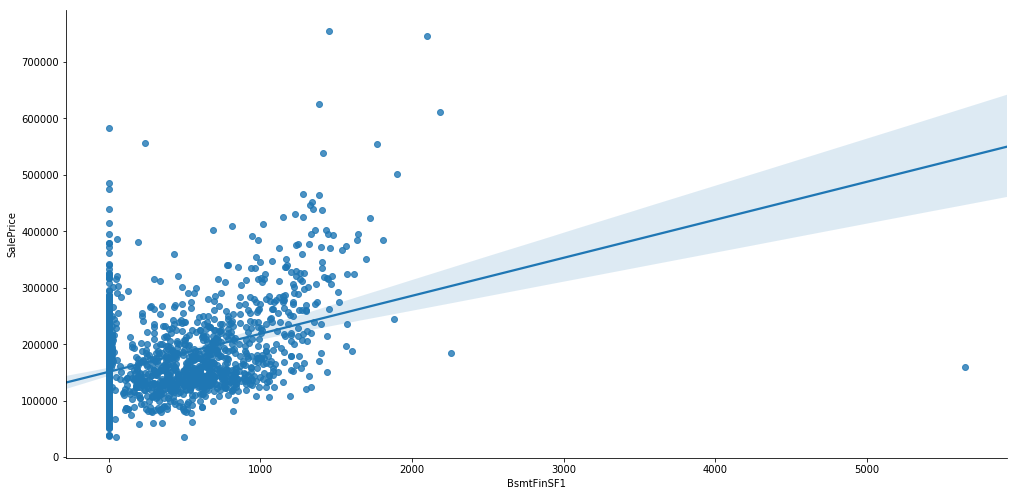

In [17]:
sns.pairplot(data, x_vars='BsmtFinSF1', y_vars='SalePrice', height=7, aspect=2, kind='reg')

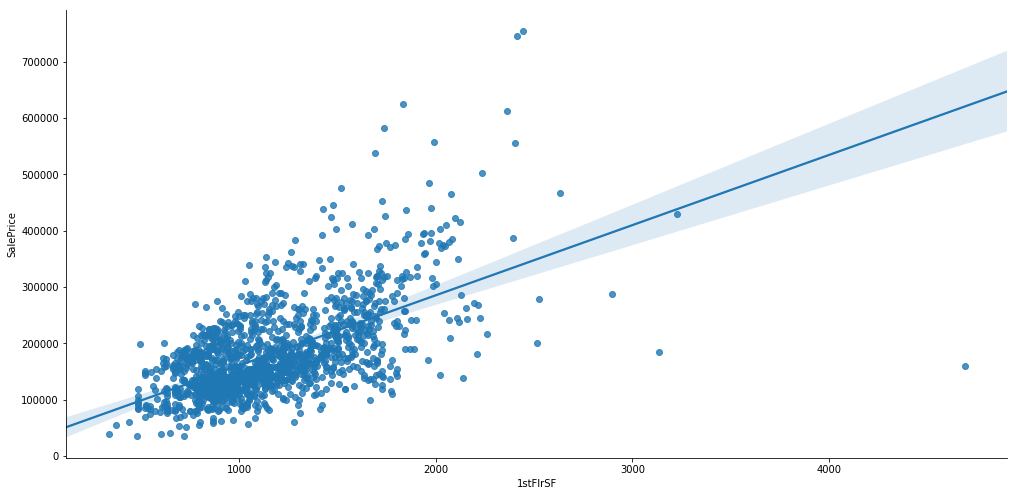

In [18]:
sns.pairplot(data, x_vars='1stFlrSF', y_vars='SalePrice', height=7, aspect=2, kind='reg')

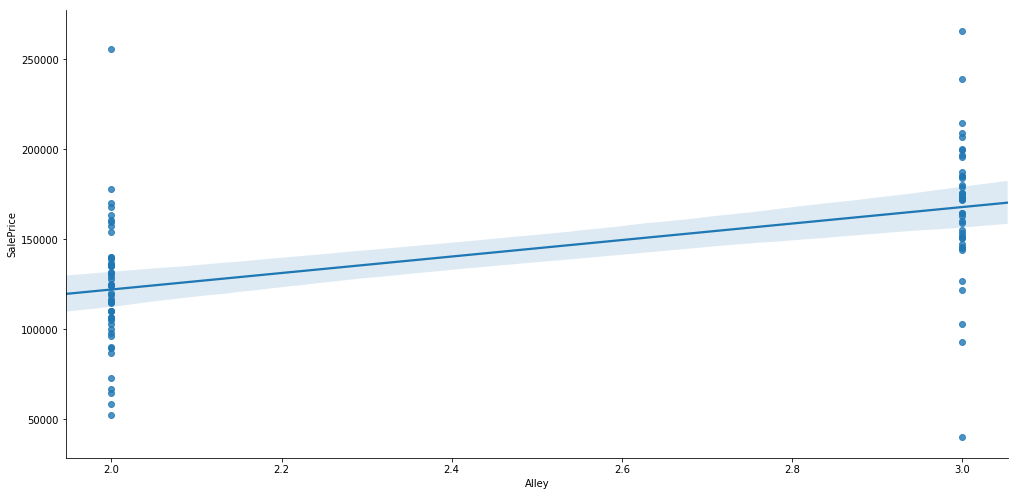

In [19]:
sns.pairplot(data, x_vars='Alley', y_vars='SalePrice', height=7, aspect=2, kind='reg')

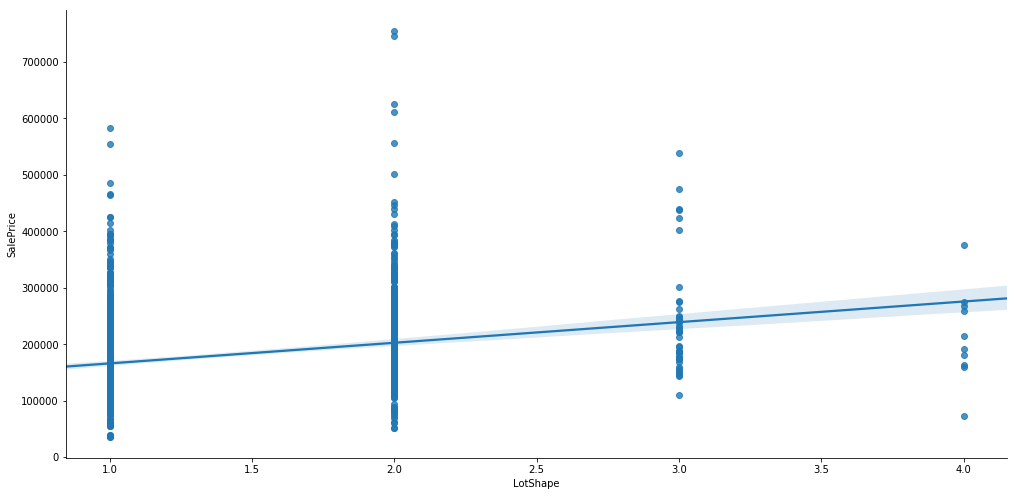

In [20]:
sns.pairplot(data, x_vars='LotShape', y_vars='SalePrice', height=7, aspect=2, kind='reg')

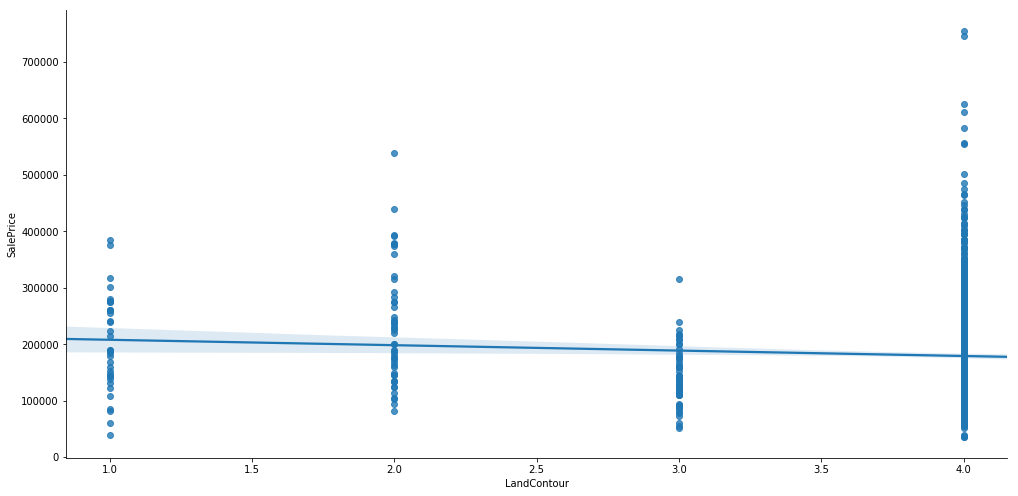

In [21]:
sns.pairplot(data, x_vars='LandContour', y_vars='SalePrice', height=7, aspect=2, kind='reg')

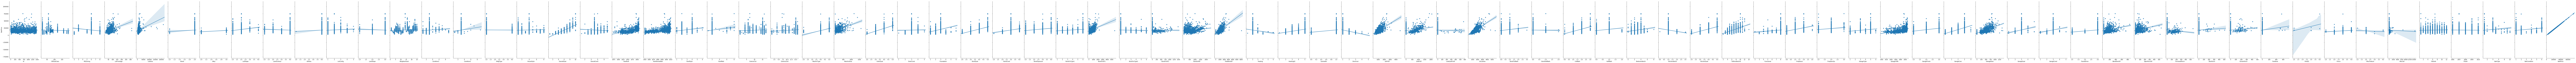

In [24]:
sns.pairplot(data, x_vars=data.columns, y_vars='SalePrice', height=7, aspect=0.5, kind='reg')

## 3 Computing linear regression with gradient descend linear regression [own implementation]


In [26]:
import numpy as np
import pandas as pd
import math
from map_data import map_data

df = pd.read_csv('data/train.csv', index_col=0)

columns = [
    'MSZoning',
    'OverallQual',
    'ExterQual',
    'BsmtQual',
    'KitchenQual',
    'Alley',
    'LotShape',
    'LandContour',
    'TotalBsmtSF',
    'Utilities',
    'LotConfig',
    'Neighborhood',
    'YearRemodAdd'
]

data = map_data(df)

data = df[columns].values

Y = df['SalePrice'].values

M = len(data)
N = len(data[0])

data = np.nan_to_num(data)

X = np.ones((M, N + 1))

X[:,1:] = data


T = np.zeros(N + 1)


def HT(T, x_row):
    return sum([t * x for t, x in zip(T, x_row)])


def cost_function():
    J_t = 0

    for x_row, y in zip(X, Y):
        h_t = HT(T, x_row)
        J_t += (h_t - y)**2

    return J_t / (2*M)


def regression(alpha=0.01, err=0.00000001):
    current_error = math.inf
    prev_cost = 0
    num_iters = 0
    for _ in range(1):
        num_iters += 1
        for i, _ in enumerate(T):
            sum_T_i = 0
            for j, (x_row, y) in enumerate(zip(X, Y)):
                h_t = HT(T, x_row)
                sum_T_i += (h_t - y) * X[j][i]
            T[i] -= (alpha * sum_T_i / M)
        cost = cost_function()
        current_error = abs(prev_cost - cost)
        prev_cost = cost
    return(T, prev_cost, num_iters)


dt = pd.read_csv('data/test.csv', index_col=0)
test = map_data(dt)


test = dt[columns].values
test = np.nan_to_num(test)

xtest = np.ones((len(test), N + 1))
xtest[:,1:] = test

if __name__ == '__main__':
    T, cost, num_iters = regression()
    print('cost', cost)
    y = []
    for row in xtest:
        y.append(sum([t * x for t, x in zip(T, row)]))
    result = pd.DataFrame({'SalePrice': y}, index=dt.index)
    result.to_csv('data/result.csv')


cost 1.8155652800713652e+25


## 4 Using linear regresion with sklearn

In [27]:
from sklearn import linear_model

import numpy as np
from map_data import map_data
import pandas as pd
import warnings


warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

df = pd.read_csv('data/train.csv', index_col=0)

columns = [
    'GrLivArea',
    'YearBuilt',
    'MSSubClass',
    'LotArea',
    'YearRemodAdd',
    'MasVnrArea',
    'Foundation',
    'BsmtFinSF1',
    'TotalBsmtSF',
    '1stFlrSF',
    'TotRmsAbvGrd',
    'GarageYrBlt',
    'GarageArea',
]

# X = np.nan_to_num(map_data(df[columns]).values)
X = np.nan_to_num(map_data(df)[columns].values)

y = df['SalePrice'].values
lm = linear_model.SGDClassifier()
model = lm.fit(X, y)

dt = pd.read_csv('data/test.csv', index_col=0)
dt = map_data(dt)
Xt = np.nan_to_num(map_data(dt)[columns].values)

predictions = lm.predict(Xt)
print('score:', lm.score(Xt, predictions))
print('predictions', predictions)
result = pd.DataFrame({'SalePrice': predictions}, index=dt.index)
result.to_csv('data/result_custom.csv')


/Users/josue/.virtualenvs/is-hw1/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


score: 1.0
predictions [172500 172500 172500 ... 172500 141000 172500]
